<a href="https://colab.research.google.com/github/kulakovand/colabr_epo/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9B%D0%B0%D0%B1%D0%B0%204%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name() 

In [ ]:
import pandas as pd

import keras as ks
!pip install -q seaborn 
# при необходимости 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# from sklearn.datasets import load_breast_cancer 
# data = load_breast_cancer()
# import numpy as np 
# from sklearn.model_selection import train_test_split 
# x,y = load_breast_cancer(return_X_y=True) 
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=True)


In [ ]:
# пример загрузки датасета из файла цсв
import pandas as pd
from google.colab import files
file = files.upload()
training_set = pd.read_csv("train2.csv", header=None) 
# предполагается, что файл не содержит заголовков столбцов


Saving train2.csv to train2 (4).csv


In [ ]:
training_set = training_set.reset_index(drop=True)
data = training_set.fillna(0)
data.describe()

,1,3,7,8,9,10
count,25331.0,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000
mean,-1.0,53.096404,0.178516,14.445146,854.896648,760.816075
std,0.0,19.301623,0.382954,8.672814,206.942272,269.722902
min,-1.0,0.000000,0.000000,-1.000000,576.000000,450.000000
25%,-1.0,40.000000,0.000000,7.000000,600.000000,450.000000
50%,-1.0,55.000000,0.000000,14.000000,1024.000000,768.000000
75%,-1.0,70.000000,0.000000,22.000000,1024.000000,1024.000000
max,-1.0,85.000000,1.000000,29.000000,1024.000000,1024.000000


In [ ]:
data


,0,1,2,3,4,5,6,7,8,9,10
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767
...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,-1,female,85.0,head/neck,BCC,benign,0,19,1024,1024
25327,ISIC_0073248,-1,male,65.0,anterior torso,BKL,benign,0,7,1024,1024
25328,ISIC_0073249,-1,male,70.0,lower extremity,MEL,malignant,1,9,1024,1024
25329,ISIC_0073251,-1,female,55.0,palms/soles,NV,benign,0,15,1024,1024


<AxesSubplot:>

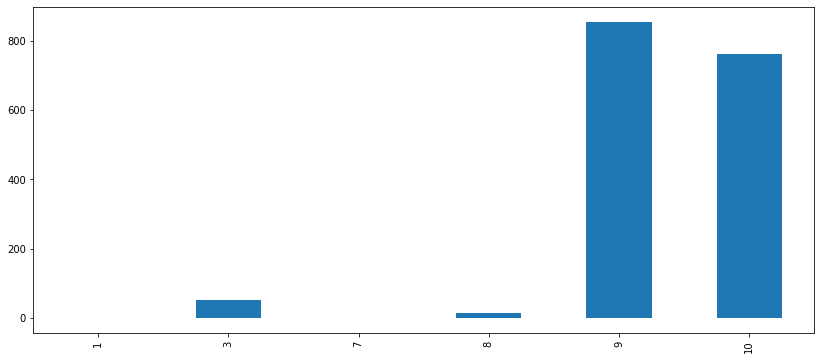

In [ ]:
import seaborn as sns
data_mean = data.describe().loc['mean']
data_mean.plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

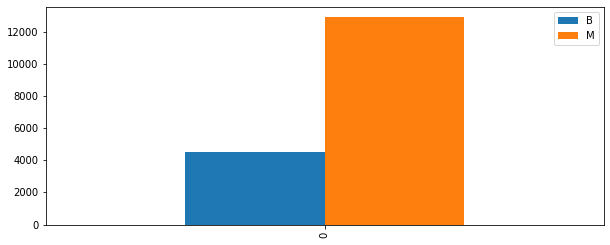

In [ ]:
data_B = data[data[5] == 'MEL']
data_M = data[data[5] == 'NV']
B_M_data = {'B': [data_B.shape[0]], 'M': [data_M.shape[0]]}
B_M_df = pd.DataFrame(data=B_M_data)
B_M_df.plot(kind='bar', figsize=(10,4))

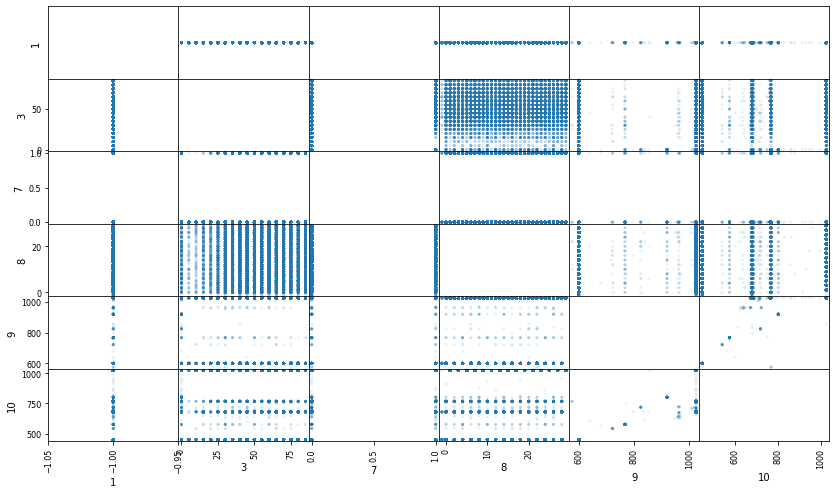

In [ ]:
diagnosis = data[5]
features = data.drop([5], axis = 1)
pd.plotting.scatter_matrix(features, alpha = 0.1, figsize = (14,8), diagonal = 'gaussian_kde');

In [ ]:
def generateData(data1): 
    # make a copy of data 
    data2 = data1.copy()
    # separate labels from features
    diagnosis2 = data2[5] # labels
    features2 = data2.drop([5], axis = 1)
    features2_headers =  ["0","1","2","3","4","5","6","7","8","9"] 
    
    mean, sigma = 0, 0.1
    # creating a noise with the same dimension as the dataset
    noise = np.random.normal(mean, sigma, features2.shape)
    features2 = features2.apply(pd.to_numeric, errors='ignore')
    features2_with_noise = features2.add(pd.DataFrame(noise, columns = features2_headers), fill_value=0) 
    data2 = pd.concat([str(features2_with_noise),  
                       str(pd.DataFrame(diagnosis2))], axis = 1)
    return data2

In [ ]:
new_data = generateData(data)
data = data.append(new_data, ignore_index=True)

In [ ]:
diagnosis = data[5]
features = data.drop([5], axis = 1) 
sqrt_features = features.copy()

for feature_name in sqrt_features.columns:
  import numpy as np
  sqrt_features[feature_name] = np.sqrt(sqrt_features[feature_name]) 
features = pd.DataFrame(sqrt_features)

In [ ]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,   
    diagnosis, test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True)

In [ ]:
X_train = X_train.values 
y_train = y_train.values 
X_test = X_test.values 
y_test = y_test.values

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test)

In [ ]:
from keras.layers import Dense
from keras.layers import Dropout 
from keras.models import Sequential

import keras.utils
from keras import utils as np_utils
def createModel():
    model = Sequential()
    model.add(Dense(9, activation='relu', input_dim=9))   
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='relu', input_shape=(9,)))   
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid', input_shape=(5,)))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [ ]:
X_train=X_train[features].to_list()

y_train=y_train['target(price_in_lacs)'].to_list()

IndexError: ignored

In [ ]:
model = createModel()
model.fit(X_train, y_train, epochs=500, batch_size=32)

ValueError: ignored

In [ ]:
X_train1, y_test1 = train_test_split(training_set, test_size=0.5, random_state=0)

In [ ]:
len(X_train1)

12665

In [ ]:
len(y_test1)

12666

In [ ]:
y_test1 = y_test1.tail(-1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_test1, test_size=0.2, random_state=True)

In [ ]:
len(X_train)


10132

In [ ]:
len(X_test)


2533

In [ ]:
len(y_train)


10132

In [ ]:
len(y_test)

2533

In [ ]:
train_dataset = training_set.sample(frac=0.8, random_state=1) 
test_dataset  = training_set.sample(frac=0.2, random_state=1) 

train_dataset

,0,1,2,3,4,5,6,7,8,9,10
8202,ISIC_0029605,-1,female,55.0,lower extremity,NV,benign,0,12,600,450
22287,ISIC_0068434,-1,female,50.0,anterior torso,NV,benign,0,25,1024,1024
11561,ISIC_0032964,-1,male,45.0,lower extremity,NV,benign,0,26,600,450
15111,ISIC_0056998,-1,male,80.0,anterior torso,MEL,malignant,1,13,1024,1024
19008,ISIC_0063217,-1,male,60.0,palms/soles,SCC,benign,0,19,1024,1024
...,...,...,...,...,...,...,...,...,...,...,...
20834,ISIC_0066155,-1,female,70.0,anterior torso,BCC,benign,0,5,1024,1024
5361,ISIC_0026764,-1,male,55.0,posterior torso,NV,benign,0,26,600,450
18217,ISIC_0061961,-1,male,60.0,anterior torso,NV,benign,0,3,1024,1024
18326,ISIC_0062133,-1,female,60.0,palms/soles,MEL,malignant,1,23,1024,1024


In [ ]:
test_dataset

,0,1,2,3,4,5,6,7,8,9,10
8202,ISIC_0029605,-1,female,55.0,lower extremity,NV,benign,0,12,600,450
22287,ISIC_0068434,-1,female,50.0,anterior torso,NV,benign,0,25,1024,1024
11561,ISIC_0032964,-1,male,45.0,lower extremity,NV,benign,0,26,600,450
15111,ISIC_0056998,-1,male,80.0,anterior torso,MEL,malignant,1,13,1024,1024
19008,ISIC_0063217,-1,male,60.0,palms/soles,SCC,benign,0,19,1024,1024
...,...,...,...,...,...,...,...,...,...,...,...
16586,ISIC_0059362,-1,female,30.0,lower extremity,MEL,malignant,1,3,1024,1024
8618,ISIC_0030021,-1,female,50.0,upper extremity,DF,benign,0,24,600,450
6430,ISIC_0027833,-1,female,50.0,NaN,NV,benign,0,20,600,450
23345,ISIC_0070084,-1,male,80.0,head/neck,BKL,benign,0,25,1024,1024


In [ ]:
desc_stats = train_dataset.describe() # подробнее см. документацию функции 
desc_stats = desc_stats.transpose() # форматирование выводимых чисел для более удобного чтения 
desc_stats


,count,mean,std,min,25%,50%,75%,max
1,20265.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0
3,19899.0,54.027087,18.181836,0.0,40.0,55.0,70.0,85.0
7,20265.0,0.177745,0.382307,0.0,0.0,0.0,0.0,1.0
8,20265.0,14.445448,8.663592,-1.0,7.0,14.0,22.0,29.0
9,20265.0,855.737725,206.749799,576.0,600.0,1024.0,1024.0,1024.0
10,20265.0,761.922230,269.603571,450.0,450.0,768.0,1024.0,1024.0


In [ ]:
def norm(x): 
  desc_stats1 = x.describe() # подробнее см. документацию функции 
  desc_stats = desc_stats1.transpose() # форматирование выводимых чисел для более удобного чтения 

  return (x - desc_stats['mean']) / desc_stats['std'] 
normed_train_dataX_train = norm(X_train) 
normed_train_data2y_train = norm(y_train) 



In [ ]:
print(normed_train_dataX_train)

        0   1    2         3    4    5    6         7         8         9   \
24990  NaN NaN  NaN  0.330448  NaN  NaN  NaN -0.471040  1.230958  0.820200   
24579  NaN NaN  NaN -0.507240  NaN  NaN  NaN -0.471040 -1.084365  0.820200   
11037  NaN NaN  NaN -1.624158  NaN  NaN  NaN -0.471040  0.652127 -1.226392   
9102   NaN NaN  NaN -0.786470  NaN  NaN  NaN -0.471040  1.578256 -1.226392   
24694  NaN NaN  NaN  0.888907  NaN  NaN  NaN -0.471040 -1.084365  0.820200   
...    ...  ..  ...       ...  ...  ...  ...       ...       ...       ...   
18540  NaN NaN  NaN  0.330448  NaN  NaN  NaN  2.122752  1.694022  0.820200   
10596  NaN NaN  NaN -0.786470  NaN  NaN  NaN  2.122752  0.652127 -1.226392   
17242  NaN NaN  NaN -0.786470  NaN  NaN  NaN  2.122752  0.767893  0.820200   
25253  NaN NaN  NaN  0.330448  NaN  NaN  NaN -0.471040 -1.315897  0.820200   
18943  NaN NaN  NaN -0.228011  NaN  NaN  NaN -0.471040  0.767893  0.820200   

             10  
24990  0.976877  
24579  0.976877  
11037 -1.

In [ ]:
print(normed_train_data2y_train)

        0   1    2         3    4    5    6         7         8         9   \
12800  NaN NaN  NaN -0.773971  NaN  NaN  NaN -0.466028 -0.278688 -1.232745   
4992   NaN NaN  NaN -0.229670  NaN  NaN  NaN -0.466028 -0.508918 -1.232745   
11758  NaN NaN  NaN -1.046122  NaN  NaN  NaN -0.466028  0.181774 -1.232745   
10916  NaN NaN  NaN  0.314630  NaN  NaN  NaN -0.466028  0.872465 -1.232745   
12671  NaN NaN  NaN  0.586781  NaN  NaN  NaN  2.145583  0.872465 -1.232745   
...    ...  ..  ...       ...  ...  ...  ...       ...       ...       ...   
15855  NaN NaN  NaN -2.134723  NaN  NaN  NaN -0.466028  1.678272  0.817049   
9647   NaN NaN  NaN  0.858931  NaN  NaN  NaN -0.466028 -0.048457 -1.232745   
13934  NaN NaN  NaN  1.675382  NaN  NaN  NaN -0.466028 -0.854264  0.817049   
6301   NaN NaN  NaN  1.131082  NaN  NaN  NaN -0.466028 -0.508918 -1.232745   
18362  NaN NaN  NaN -1.318272  NaN  NaN  NaN -0.466028  0.987580  0.817049   

             10  
12800 -1.149872  
4992  -1.149872  
11758 -1.

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
classifier = Sequential() # Инициализация НС
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 1)) 
classifier.add(Dense(units = 8, activation = 'relu')) 
classifier.add(Dense(units = 6, activation = 'relu')) 
classifier.add(Dense(units = 1, activation = 'sigmoid')) 


In [ ]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


In [ ]:
def norm(x): 
  desc_stats1 = x.describe() # подробнее см. документацию функции 
  desc_stats = desc_stats1.transpose() # форматирование выводимых чисел для более удобного чтения 

  return (x - desc_stats['mean']) / desc_stats['std'] 
  X_train =norm(X_train)
  y_train =norm(y_train)
  X_test =norm(X_test)
  y_test =norm(y_test)

In [ ]:
X_train = np.array([np.array(val) for val in X_train])
y_train = np.array([np.array(val) for val in y_train])

# X_train = tf.cast(X_train , dtype=tf.float32)
# y_train = tf.cast(y_train , dtype=tf.float32)

X_test = np.array([np.array(val) for val in X_test])
y_test = np.array([np.array(val) for val in y_test])

# X_test = tf.cast(X_test , dtype=tf.float32)
# y_test = tf.cast(y_test , dtype=tf.float32)

In [ ]:
X_test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 30, epochs = 200)
#classifier.fit(normed_train_dataX_train, normed_train_data2y_train, batch_size = 1, epochs = 100)

ValueError: ignored

In [ ]:
Y_pred = classifier.predict(X_test) # подаём на вход обученной НС тестовый набор данных 
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]


1/1 [==============================] - 0s 20ms/step


In [ ]:
total = 0
correct = 0
wrong = 0
for i in range(len(Y_pred)):
 total=total+1
 if(str(y_test[i]) == str(Y_pred[i])):
  correct=correct+1
 else:
  wrong=wrong+1

print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))


Total 11
Correct 1
Wrong 10
